# Example usage

To use `imgcv` in a project:

## Transformations

### Negative Transformation

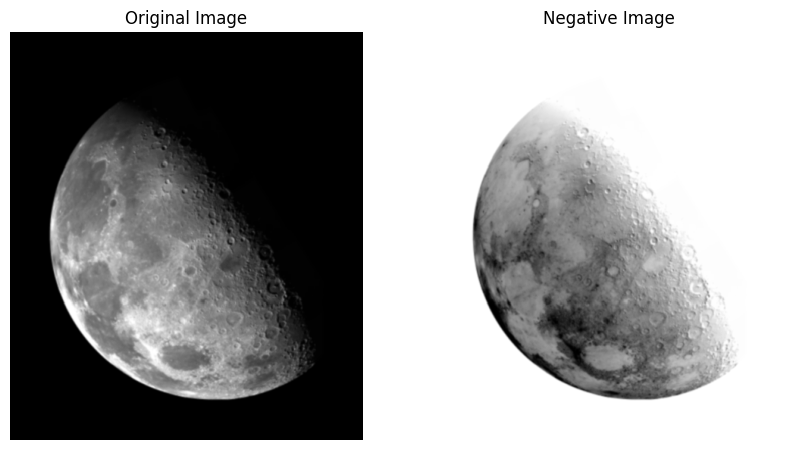

In [2]:
from imgcv.transformations.negative import negative_transform

im = Image.open("images/transformations/moon.tif")
im = np.array(im)
negative_im = negative_transform(im)

negative_im = Image.fromarray(negative_im)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(negative_im, cmap="gray")
plt.title("Negative Image")
plt.axis("off")
plt.show()


### Power-Law (Gamma) Transformation

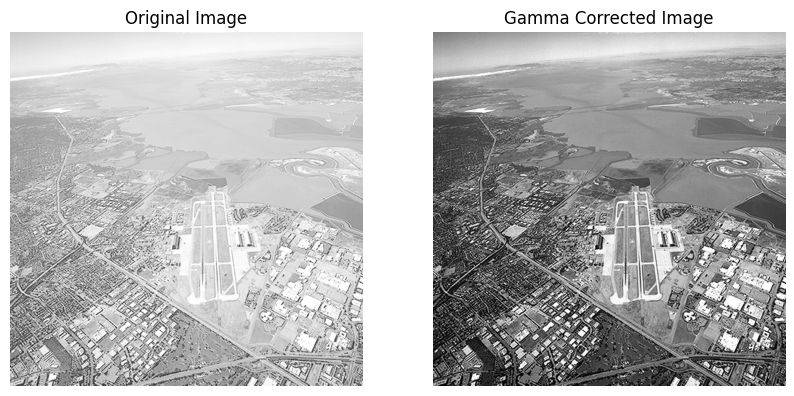

In [8]:
from imgcv.transformations.gamma import gamma_correction

im = Image.open("images/transformations/city.tif")
im = np.array(im)
gamma_im = gamma_correction(im, gamma=3)

gamma_im = Image.fromarray(gamma_im)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gamma_im, cmap="gray")
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()

## Histogram Equalization

### For Gray Scale Images

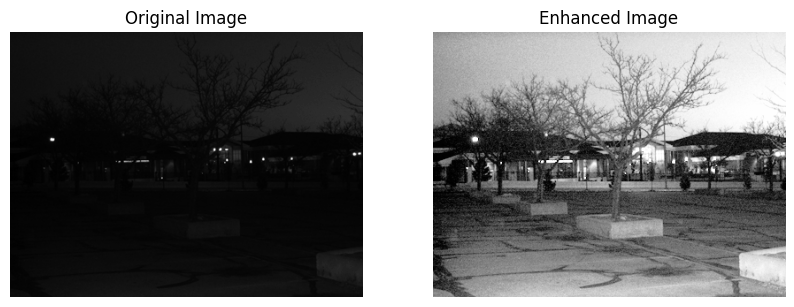

In [17]:
from imgcv.histogram.histogram_equalization import histogram_equalization

im = Image.open("images/uni_dark.png")
im = im.convert("L")
im = np.array(im)

equalized_im, _ = histogram_equalization(im)
equalized_im = Image.fromarray(equalized_im)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(equalized_im, cmap="gray")
plt.title("Enhanced Image")
plt.axis("off")
plt.show()


### For Color Image

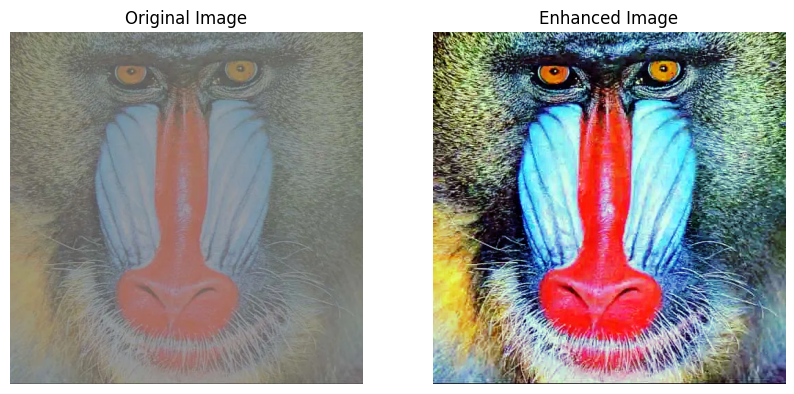

In [2]:
from imgcv.histogram.histogram_equalization import histogram_equalization

im = Image.open("images/monkey_faded.webp")
im = np.array(im)

equalized_im, _ = histogram_equalization(im)
equalized_im = Image.fromarray(equalized_im)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(equalized_im)
plt.title("Enhanced Image")
plt.axis("off")
plt.show()


## Histogram Matching/Specification

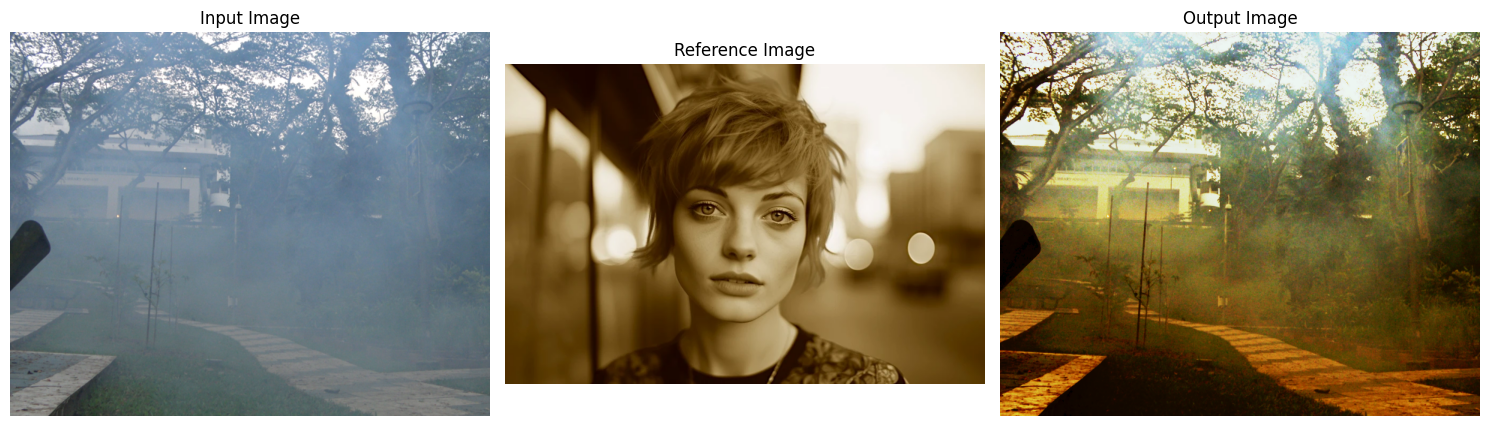

In [16]:
from imgcv.histogram.matching import matchHistogram

img = Image.open("images/park.png").convert("RGB")
ref_img = Image.open("images/pretty_girl.webp")

final_img, _, _ = matchHistogram(np.array(img), np.array(ref_img))

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis("off")
plt.subplot(132)
plt.imshow(ref_img, cmap='gray')
plt.title('Reference Image')
plt.axis("off")
plt.subplot(133)
plt.imshow(final_img, cmap='gray')
plt.title('Output Image')
plt.axis("off")
plt.tight_layout()
plt.show()

## Filters in Spatial Domain

### Linear Filters

#### Mean / Average / Box Filter

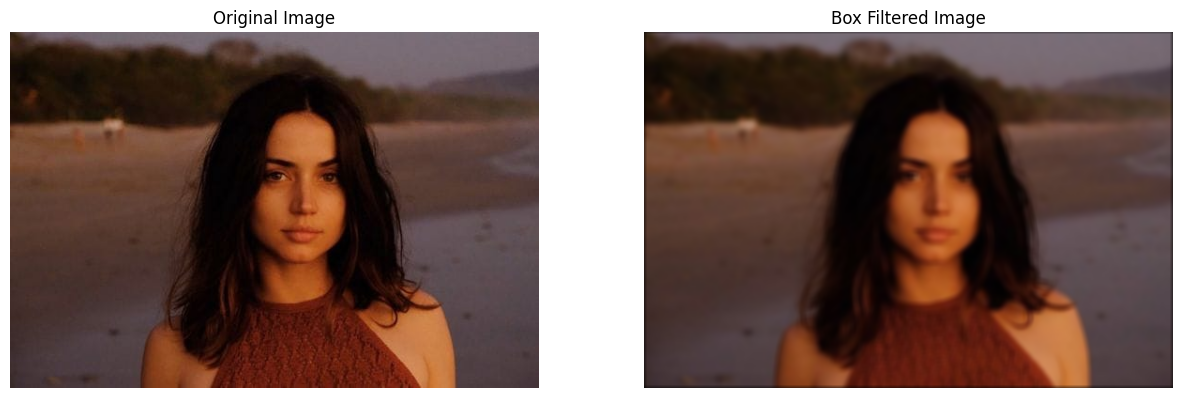

In [5]:
from imgcv.filters.linear import box_filter

img = Image.open("images/alt.jpeg")
img = np.array(img)
smoothed_img = box_filter(img, filter_size=(7, 7))

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(smoothed_img)
ax[1].set_title("Box Filtered Image")
ax[1].axis("off")
plt.show()

#### Laplacian Filter

##### Detecting Edges

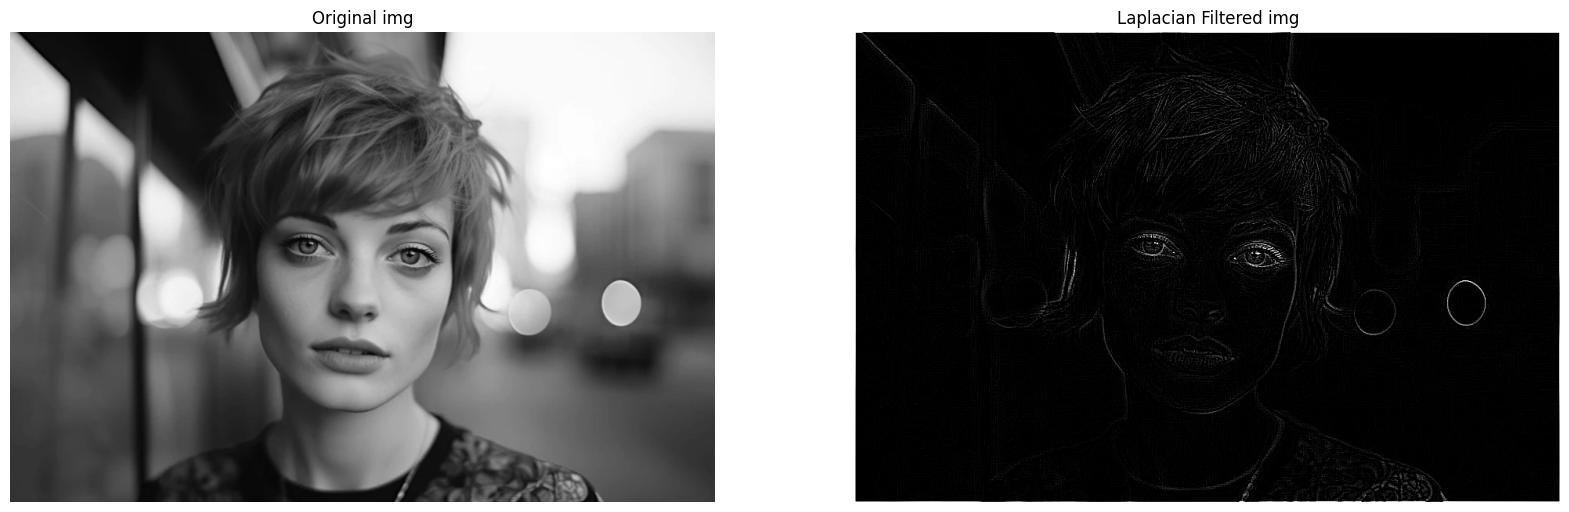

In [2]:
from imgcv.filters.linear import laplacian_filter

img = Image.open("images/pretty_girl.webp").convert("L")
img = np.array(img)
laplacian_img = laplacian_filter(img, diagonal=True, return_edges=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(laplacian_img, cmap="gray")
ax[1].set_title("Laplacian Filtered image")
ax[1].axis("off")
plt.show()

##### Sharpening Image

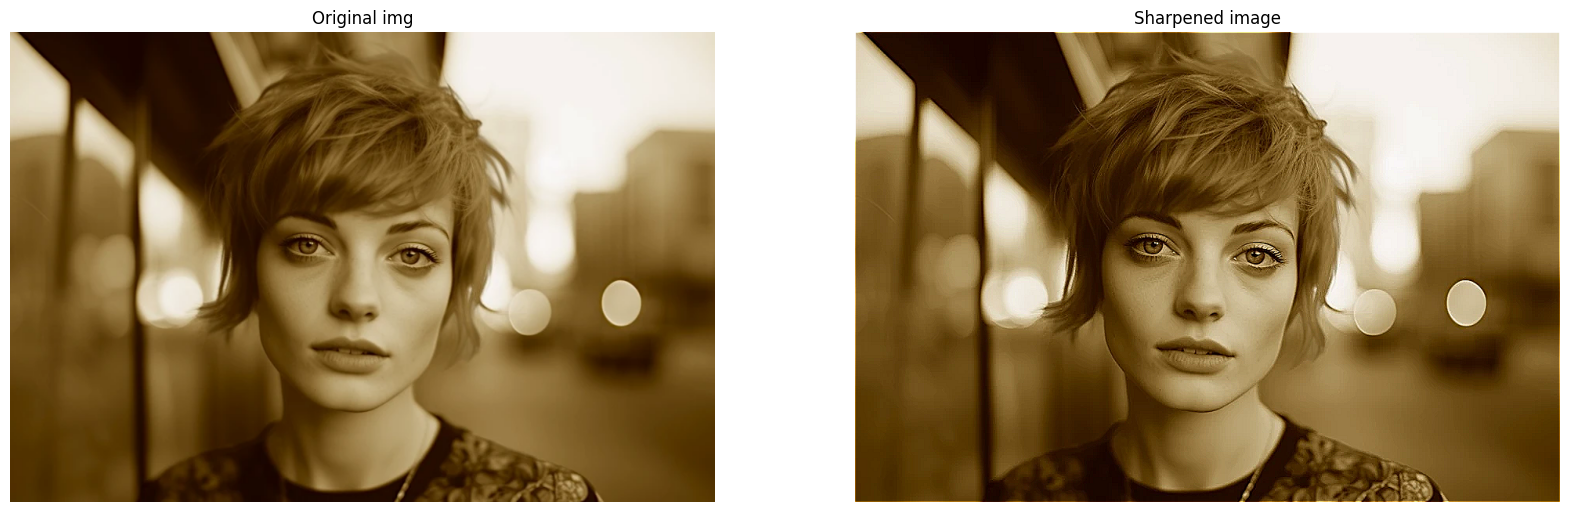

In [3]:
from imgcv.filters.linear import laplacian_filter

img = Image.open("images/pretty_girl.webp")
img = np.array(img)
sharpened_img = laplacian_filter(img, diagonal=False, return_edges=False)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(sharpened_img, cmap="gray")
ax[1].set_title("Sharpened image")
ax[1].axis("off")
plt.show()

##### Robert Cross Operator

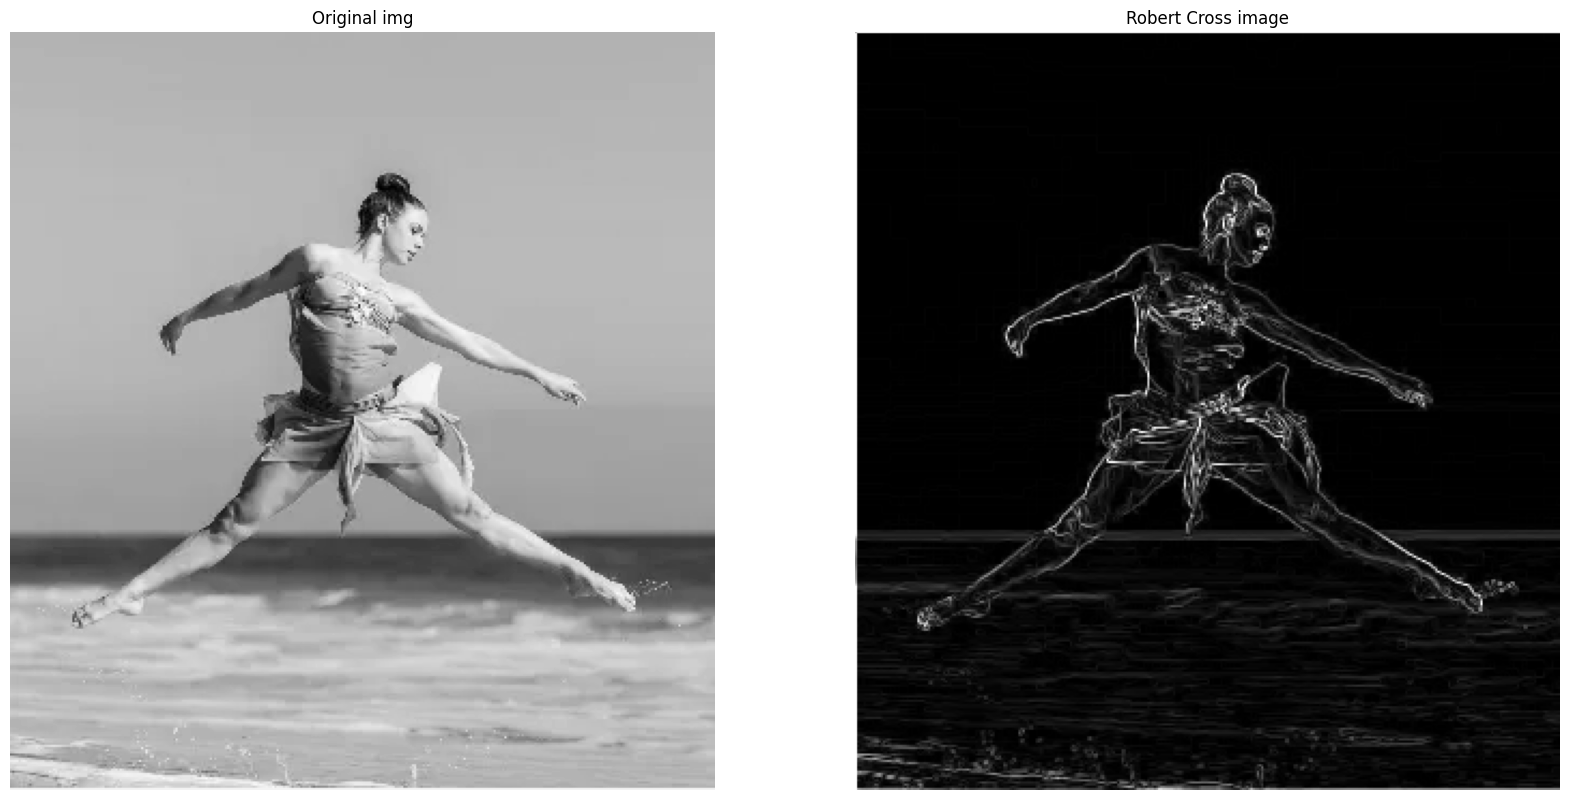

In [4]:
from imgcv.filters.linear import robert_cross_filter

img = Image.open("images/girl_jumping.webp").convert("L")
img = np.array(img)

robert_cross_img = robert_cross_filter(img)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(robert_cross_img, cmap="gray")
ax[1].set_title("Robert Cross image")
ax[1].axis("off")
plt.show()

##### Sobel Filter

Sobel Filter can be used to detect defects in the image which is an preprocessing step in many image processing applications or in automated inspection systems. For example, in the image below, the defects are detected using Sobel Filter.

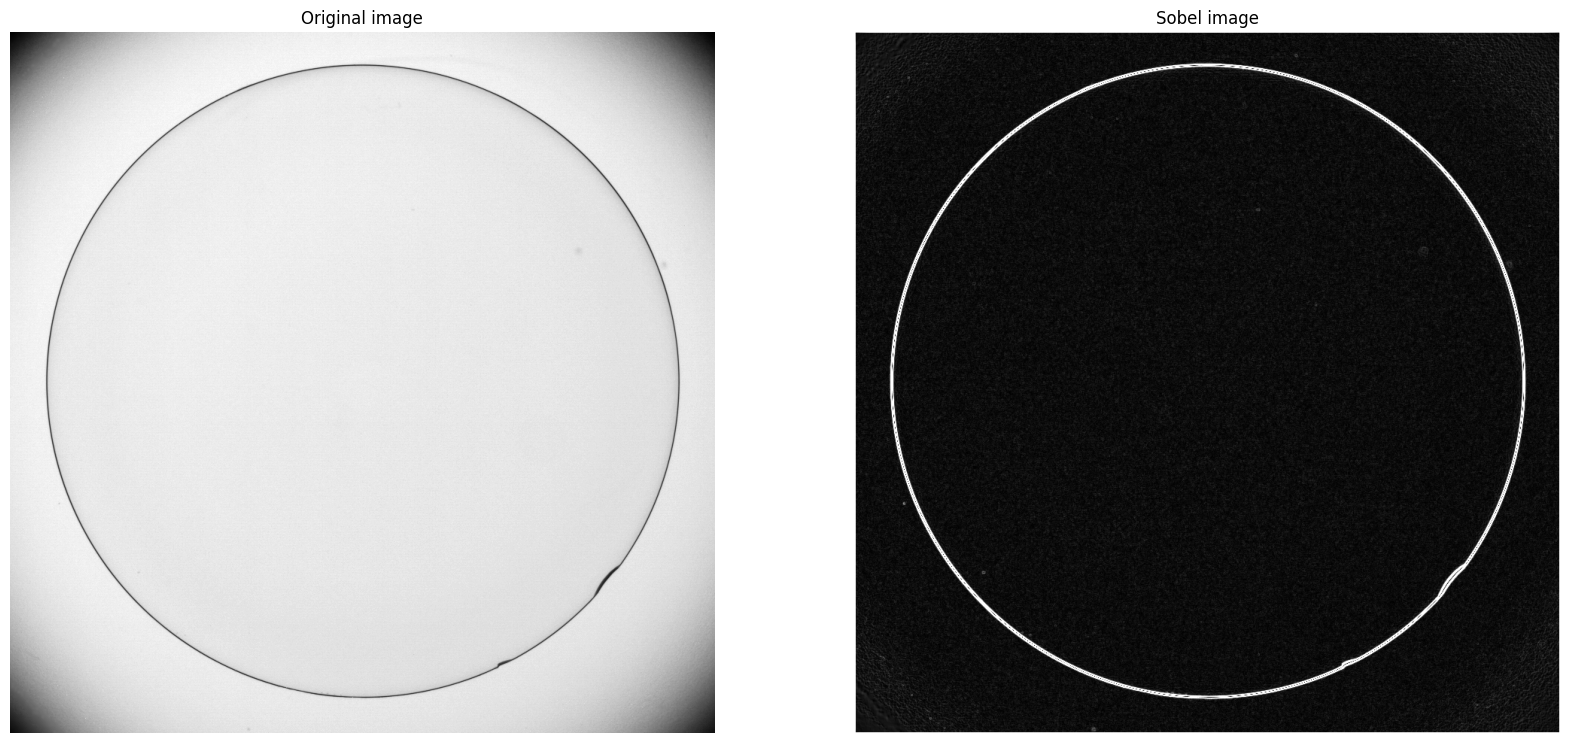

In [7]:
from imgcv.filters.linear import sobel_filter

img = Image.open("images/contact_lens.tif").convert("L")
img = np.array(img)

sobel_img = sobel_filter(img)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(sobel_img, cmap="gray")
ax[1].set_title("Sobel image")
ax[1].axis("off")
plt.show()

We can see two edge defect near 4 and 5 o'clock position.

### Non-Linear Filters

#### Min Filter

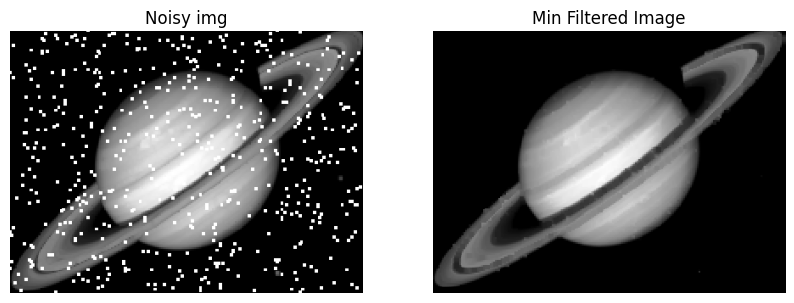

In [7]:
from imgcv.filters.non_linear import min_filter

img = Image.open("images/saturn_salt.png")
img = np.array(img)

reduced_noisy_img = min_filter(img, (5,5))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Noisy img")
ax[0].axis("off")
ax[1].imshow(reduced_noisy_img, cmap="gray")
ax[1].set_title("Min Filtered Image")
ax[1].axis("off")
plt.show()

#### Max Filter

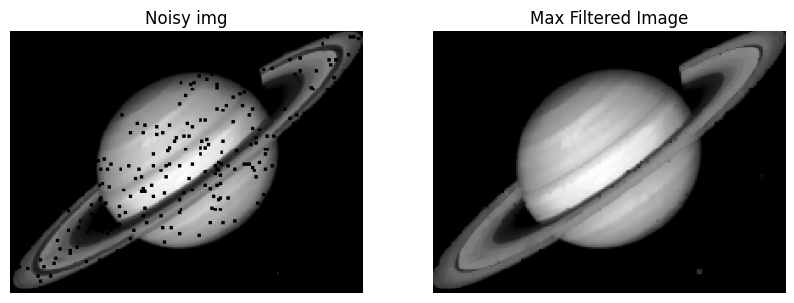

In [8]:
from imgcv.filters.non_linear import max_filter

img = Image.open("images/saturn_pepper.png")
img = np.array(img)

reduced_noisy_img = max_filter(img, (5,5))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Noisy img")
ax[0].axis("off")
ax[1].imshow(reduced_noisy_img, cmap="gray")
ax[1].set_title("Max Filtered Image")
ax[1].axis("off")
plt.show()

#### Median Filter

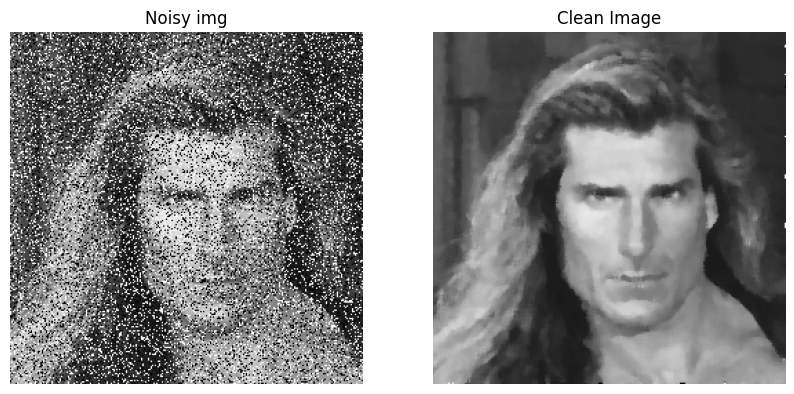

In [2]:
from imgcv.filters.non_linear import median_filter

img = Image.open("images/man_noisy.png")
img = np.array(img)

clean_image= median_filter(img, (5,5))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Noisy img")
ax[0].axis("off")
ax[1].imshow(clean_image, cmap="gray")
ax[1].set_title("Clean Image")
ax[1].axis("off")
plt.show()

## Fourier Transform

### Convert Image to Frequency Domain

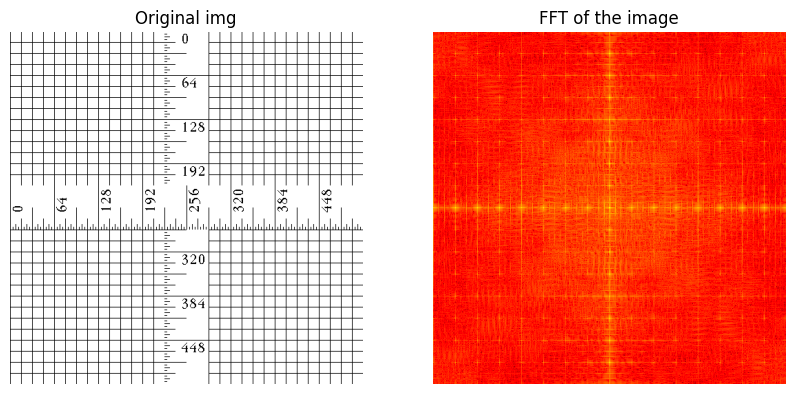

In [15]:
from imgcv.fftpack.fft import fft2, fftshift

img = Image.open("images/ruler.tiff")
img = np.array(img)

img_fft = fft2(img)
img_fft = fftshift(img_fft)
img_fft = np.log(1 + np.abs(img_fft)) # taking log so that we can get a better visualization

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original img")
ax[0].axis("off")
ax[1].imshow(img_fft, cmap="hot")
ax[1].set_title("FFT of the image")
ax[1].axis("off")
plt.show()

### Convert FFT Image to Spatial Domain

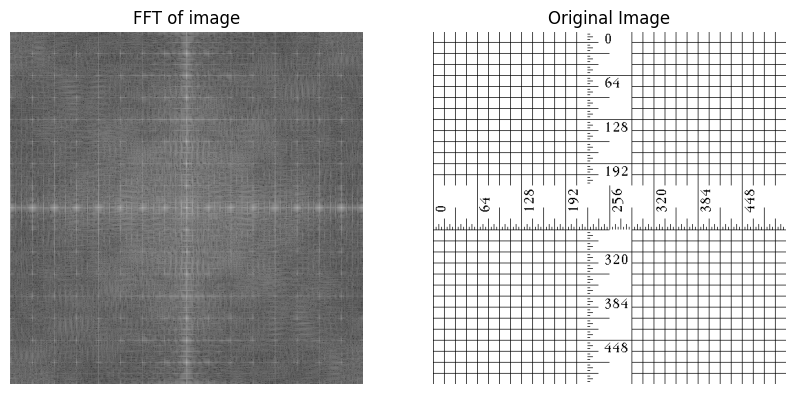

In [14]:
from imgcv.fftpack.fft import fft, ifft2

img = Image.open("images/ruler.tiff")
img = np.array(img)

img_fft = fft2(img)
img_fft = fftshift(img_fft) # shifting doen't affect the ifft result.

img_ifft = ifft2(img_fft)
img_ifft = np.abs(img_ifft) # taking absolute value to remove any complex part

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(1 + np.abs(img_fft)), cmap="gray")
ax[0].set_title("FFT of image")
ax[0].axis("off")
ax[1].imshow(img_ifft, cmap="gray")
ax[1].set_title("Original Image")
ax[1].axis("off")
plt.show()

## Filters in Frequency Domain

### Low Pass Filter

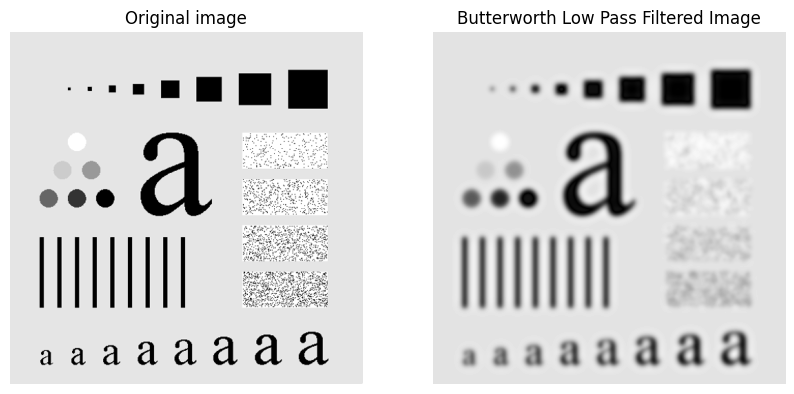

In [5]:
from imgcv.filters.freq_domain import low_pass_filter

img = Image.open("images/bands.tif").convert("L")
img = img.resize((512, 512))
img = np.array(img)

low_pass_img = low_pass_filter(img,cutoff=30, order=2, type="butterworth", return_img_fft=False)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(low_pass_img, cmap="gray")
ax[1].set_title("Butterworth Low Pass Filtered Image")
ax[1].axis("off")
plt.show()

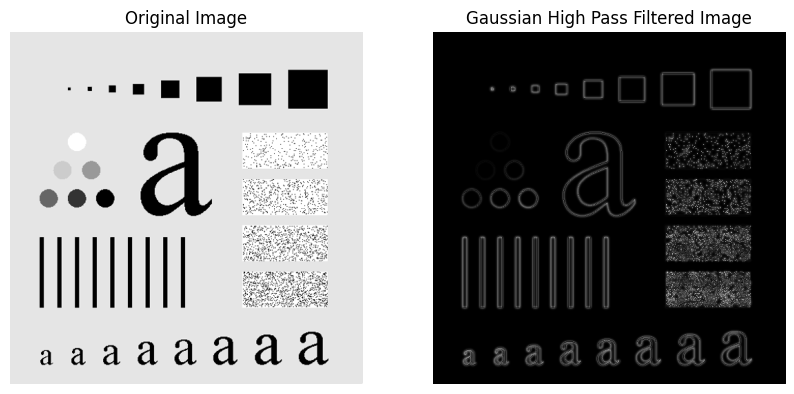

In [6]:
from imgcv.filters.freq_domain import high_pass_filter

img = Image.open("images/bands.tif").convert("L")
img = img.resize((512, 512))
img = np.array(img)

high_pass_img = high_pass_filter(img, cutoff=50, type="gaussian", return_img_fft=False)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(high_pass_img, cmap="gray")
ax[1].set_title("Gaussian High Pass Filtered Image")
ax[1].axis("off")
plt.show()